<!DOCTYPE html>
<html>
<body>

<h1 style="text-align:center">Location selection for new business in Manhattan and Brooklyn</h1>
<p><h2>1 Introduction</h2></p>
<p><h3>1.1 Description and a discussion of the background.</h3></p>
<p><h4>1.1.1 Background</h4></p>
<p>Manhattan, often referred to by residents of the New York City area as the City, is the most densely populated of the five boroughs of New York City, and coextensive with the County of New York, one of the original counties of the U.S. state of New York. Manhattan serves as the city's economic and administrative center, cultural identifier,1 and historical birthplace.2 The borough consists mostly of Manhattan Island, bounded by the Hudson, East, and Harlem rivers; as well as several small adjacent islands. Manhattan additionally contains Marble Hill, a small neighborhood now on the U.S. mainland, that was connected using landfill to the Bronx and separated from the rest of Manhattan by the Harlem River. Manhattan Island is divided into three informally bounded components, each aligned with the borough's long axis: Lower, Midtown, and Upper Manhattan. Brooklyn is also a borough of New York City, coterminous with Kings County, located in the U.S. state of New York. It is the most populous county in the state, the second-most densely populated county in the United States,3 and New York City's most populous borough, with an estimated 2,648,403 residents in 2020.4 Named after the Dutch village of Breukelen, it shares a land border with the borough of Queens at the western end of Long Island. Brooklyn has several bridge and tunnel connections to the borough of Manhattan across the East River, and the Verrazzano-Narrows Bridge connects it with Staten Island.

Although there are numerous restaurants spread in the two boroughs, there are new ones opening all the time. Therefore to analyze locations, types, and the number of these restaurants is a plus for those who want to open a new restaurant in the city.</p>

<p>1.1.2 Problem Searching an optimal location to open a restaurant in the two boroughs can be challenging. One could think that the better location for it should be at a place where there is no restaurant. But the problem is that perhaps most of the interested customers instead of going to an isolated neighborhood, prefer to go to a popular neighborhood, where there are more options and there is movement of people. While the concurrence will be big in these regions, the flux of interested customers in this specific region will be relevant as well. Many people, for example, go on the weekends to a specific restaurant and when they arrive, there is a large line waiting for them. This usually happens because it is also a new trend, in some popular restaurants, not to have an option to make a reservation. The good news is that perhaps some of the customers, those who do not want to wait too long in line, might want to search for similar options in the neighborhood. 

1 "New York City". TravelPulse. July 26, 2018. Archived from the original on May 8, 2020. Retrieved May 11, 2020. 

2 "Manhattan, New York – Some of the Most Expensive Real Estate in the World Overlooks Central Park". The Pinnacle List. Archived from the original on November 29, 2014. Retrieved November 24, 2014. 

3 GCT-PH1; Population, Housing Units, Area, and Density: 2000 – United States – County by State; and for Puerto Rico from the Census 2000 Summary File 1 (SF 1) 100-Percent Data Archived February 12, 2020, at Archive.today, United States Census Bureau. Retrieved September 18, 2016. 

4 https://data.cityofnewyork.us/City-Government/2020-population/t8c6-3i7b</p>
</body>
</html>


<!DOCTYPE html>
<html>
<body>

<p><h2>2. Data acquisition</h2></p>
<p><h3>2.1 Data source</h3></p>

<p>
To consider the problem we can list the datas as below:
<dl>
  <dt>Spatial Data Repository of NYU [5].from Spatial Data Repository of NYU, I cleaned the data and use it to create choropleth map.</dt>
  <dd>- 1.	2010 Median Age in Manhattan and Brooklyn</dd>
  <dd>- 2.	2010 Housing Characteristics in Manhattan and Brooklyn</dd>
  <dd>- 2010 New York City Boroughs</dd>
  <dt>Foursquare API to select the number of restaurants and their location in some neighborhoods of NYC[6].</dt>
</dl>
<br>
[5] NYC Spatial Data repository. https://geo.nyu.edu/catalog?f%5Bdct_spatial_sm%5D%5B%5D=New+York%2C+New+York%2C+United+States&bbox=-74.558716%2040.195659%20-73.399658%2041.19519<br>
[6] Forsquare API  https://developer.foursquare.com/

</p>
<p><h3>2.2 Feature selection</h3></p>
<p>
I will first create a dataset thought the Foursquare API, exploring several types of venues, such as ID, name, category (restaurant), latitude, longitude, neighborhood, and distance (in meters) to Manhattan and Brooklyn, NYC, where both are very famous to have various restaurants. 

I will save the data collected using Foursquare API to a CSV file and then read them with Pandas.

Then, I will create another dataset that has information about places with densest population in NYC. First, I will create the features "pop_density" and "housing" of these places and then with the help of json files, I will get the latitude, longitude features. Then, I will save to a file CSV and read it with Pandas.

</p>
</body>
</html>


# 3. Exploratory Data Analysis

In [1]:
# import the necessary Libraries 
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# to get name using geo coordinates
import reverse_geocoder as rg
print('Libraries imported.')


Libraries imported.


## 1. Download and Explore Dataset

# M-B-housing

Notice how all the relevant data is in the features key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

In [2]:

with open('2010 Housing Characteristics in Manhattan and Brooklyn.json') as json_data:
    ny_housing = json.load(json_data)
ny_housing["features"][20]["properties"]

{'geoid10': '36061023100',
 'namelsad10': 'Census Tract 231',
 'total_pop': 5865,
 'totalunits': 2912,
 'occupied': 2615,
 'vacant': 297,
 'rent': 159,
 'rentempty': 9,
 'forsale': 23,
 'soldempty': 5,
 'seasonal': 26,
 'vacantothr': 75,
 'vacantrate': 5.4,
 'rentvacrt': 6.7,
 'totaloccup': 2615,
 'ownerocc': 396,
 'renteroccu': 2219,
 'shape_leng': 0.01803175633,
 'shape_area': 1.950026e-05,
 'cartodb_id': 1041,
 'created_at': '2015-04-16Z',
 'updated_at': '2015-04-16Z',
 'bbox': [-73.94760543662838,
  40.82326828023336,
  -73.9405964344535,
  40.82840928115502]}

In [3]:
ny_housing["features"][20]["properties"]["geoid10"]

'36061023100'

The next task is essentially transforming this data of nested Python dictionaries into a pandas dataframe. So let's start by creating an empty dataframe.

Take a look at the empty dataframe to confirm that the columns are as intended.

In [4]:
# define the dataframe columns
column_names = ['geoid10', 'namelsad10', 'total_pop','totalunits','occupied', "vacant",'rent','shape_area','cartodb_id','bbox'] 

# instantiate the dataframe
M_brook_housing = pd.DataFrame(columns=column_names)
M_brook_housing

,geoid10,namelsad10,total_pop,totalunits,occupied,vacant,rent,shape_area,cartodb_id,bbox


Then let's loop through the data and fill the dataframe one row at a time.

In [5]:
for data in ny_housing["features"]:
    geoid10 = data['properties']['geoid10']
    namelsad10 = data['properties']['namelsad10']
    total_pop = data['properties']['total_pop']
    totalunits = data['properties']['totalunits']
    occupied = data['properties']['occupied']
    vacant = data['properties']['vacant']
    rent = data['properties']['rent'] 
    shape_area = data['properties']['shape_area']
    cartodb_id = data['properties']['cartodb_id'] 
    bbox = data['properties']['bbox']

    M_brook_housing = M_brook_housing.append({'geoid10': geoid10,
                                          'namelsad10': namelsad10,
                                          'total_pop': total_pop,
                                          "totalunits": totalunits,
                                          "occupied": occupied,
                                          "vacant": vacant,
                                          "rent": rent,
                                          "shape_area": shape_area,
                                          "bbox": bbox,
                                          "cartodb_id": cartodb_id}, ignore_index=True)

In [6]:
#Quickly examine the resulting dataframe.
M_brook_housing.head(4)

,geoid10,namelsad10,total_pop,totalunits,occupied,vacant,rent,shape_area,cartodb_id,bbox
0,36047044900,Census Tract 449,2932,1125,1085,40,21,0.000249,420,"[-73.94109242829646, 40.707757257992974, -73.9..."
1,36047070600,Census Tract 706,2700,1078,1023,55,12,0.000272,748,"[-73.9102614121285, 40.60530270637726, -73.889..."
2,36061029900,Census Tract 299,3834,1493,1478,15,15,0.000101,1037,"[-73.9247164315008, 40.85512028722816, -73.908..."
3,36047034000,Census Tract 340,2248,649,646,3,3,0.000014,19,"[-74.00254943898581, 40.57152822906081, -73.99..."


# Manhattan Brooklyn median age

In [7]:
with open('2010 Median Age in Manhattan and Brooklyn.json') as json_data:
    ny_age = json.load(json_data)
ny_age["features"][0]["properties"]

{'geoid10': '36047062800',
 'namelsad10': 'Census Tract 628',
 'total_pop': 5226,
 'age_mdn': 41.8,
 'maleagemdn': 40.8,
 'fmlagemdn': 42.7,
 'shape_leng': 0.04708138402,
 'shape_area': 0.00011104357,
 'cartodb_id': 320,
 'created_at': '2015-04-16Z',
 'updated_at': '2015-04-16Z',
 'bbox': [-73.93305741804973,
  40.58437823409214,
  -73.91805709859584,
  40.59848423657163]}

In [8]:
ny_age["features"][0]["properties"]["age_mdn"]

41.8

In [9]:
# define the dataframe columns
column_names = ['geoid10', 'namelsad10', 'total_pop','age_mdn','maleagemdn', "fmlagemdn",'shape_area','cartodb_id','bbox'] 

# instantiate the dataframe
M_B_age = pd.DataFrame(columns=column_names)
M_B_age

,geoid10,namelsad10,total_pop,age_mdn,maleagemdn,fmlagemdn,shape_area,cartodb_id,bbox


In [10]:
for data in ny_age["features"]:
    geoid10 = data['properties']['geoid10']
    namelsad10 = data['properties']['namelsad10']
    total_pop = data['properties']['total_pop']
    maleagemdn = data['properties']['maleagemdn']
    fmlagemdn = data['properties']['fmlagemdn']
    age_mdn = data['properties']['age_mdn']
    shape_area = data['properties']['shape_area']
    bbox = data['properties']['bbox']
    cartodb_id = data['properties']['cartodb_id']

    M_B_age = M_B_age.append({'geoid10': geoid10,
                                          'namelsad10': namelsad10,
                                          'total_pop': total_pop,
                                          "age_mdn": age_mdn,
                                          "maleagemdn": maleagemdn,
                                          "fmlagemdn": fmlagemdn,
                                          "shape_area": shape_area,
                                          'geoid10': geoid10,
                                          "bbox": bbox,
                                          "cartodb_id": cartodb_id}, ignore_index=True)

In [11]:
M_B_age.head(3)

,geoid10,namelsad10,total_pop,age_mdn,maleagemdn,fmlagemdn,shape_area,cartodb_id,bbox
0,36047062800,Census Tract 628,5226,41.8,40.8,42.7,0.000111,320,"[-73.93305741804973, 40.58437823409214, -73.91..."
1,36061029900,Census Tract 299,3834,38.8,32.2,43.5,0.000101,1037,"[-73.9247164315008, 40.85512028722816, -73.908..."
2,36047066600,Census Tract 666,0,0.0,0.0,0.0,0.001049,59,"[-73.93972742091945, 40.57675941631871, -73.88..."


# Manhattan_Brooklyn population

In [12]:

with open('2010 Population in Manhattan and Brooklyn.json') as json_data:
    ny_subpop = json.load(json_data)
ny_subpop["features"][0]["properties"]

{'geoid10': '36047031500',
 'namelsad10': 'Census Tract 315',
 'total_pop': 5175,
 'shape_leng': 0.01837924217,
 'shape_area': 1.914676e-05,
 'bbox': [-73.95298842947501,
  40.675061251058246,
  -73.94691242750973,
  40.67873025157672]}

In [13]:
# define the dataframe columns
column_names = ['geoid10', 'namelsad10', 'total_pop', 'shape_area','bbox'] 

# instantiate the dataframe
M_B_pop = pd.DataFrame(columns=column_names)
M_B_pop

,geoid10,namelsad10,total_pop,shape_area,bbox


In [14]:
for data in ny_subpop["features"]:
    geoid10 = data['properties']['geoid10']
    namelsad10 = data['properties']['namelsad10']
    total_pop = data['properties']['total_pop']
    shape_area = data['properties']['shape_area']
    bbox = data['properties']['bbox']
    
    M_B_pop = M_B_pop.append({'geoid10': geoid10,
                                          'namelsad10': namelsad10,
                                          'total_pop': total_pop,
                                          "shape_area": shape_area,
                                          'geoid10': geoid10,
                                          "bbox": bbox}, ignore_index=True)

In [15]:
M_B_pop.head(5)

,geoid10,namelsad10,total_pop,shape_area,bbox
0,36047031500,Census Tract 315,5175,0.000019,"[-73.95298842947501, 40.675061251058246, -73.9..."
1,36047031701,Census Tract 317.01,3433,0.000015,"[-73.9530204291207, 40.672388250525145, -73.94..."
2,36047031702,Census Tract 317.02,3363,0.000015,"[-73.95327142903975, 40.66971324999149, -73.94..."
3,36047031900,Census Tract 319,3508,0.000016,"[-73.95100542799328, 40.663913248739725, -73.9..."
4,36047032100,Census Tract 321,5001,0.000017,"[-73.9538504288465, 40.663736248604536, -73.95..."


# merge m-b population & housing

In [16]:
merge = pd.merge(M_brook_housing, M_B_age, how = "left", on="geoid10")
merge.head()


,geoid10,namelsad10_x,total_pop_x,totalunits,occupied,vacant,rent,shape_area_x,cartodb_id_x,bbox_x,namelsad10_y,total_pop_y,age_mdn,maleagemdn,fmlagemdn,shape_area_y,cartodb_id_y,bbox_y
0,36047044900,Census Tract 449,2932,1125,1085,40,21,0.000249,420,"[-73.94109242829646, 40.707757257992974, -73.9...",Census Tract 449,2932,36.0,33.2,38.9,0.000249,420,"[-73.94109242829646, 40.707757257992974, -73.9..."
1,36047070600,Census Tract 706,2700,1078,1023,55,12,0.000272,748,"[-73.9102614121285, 40.60530270637726, -73.889...",Census Tract 706,2700,44.5,43.0,46.4,0.000272,748,"[-73.9102614121285, 40.60530270637726, -73.889..."
2,36061029900,Census Tract 299,3834,1493,1478,15,15,0.000101,1037,"[-73.9247164315008, 40.85512028722816, -73.908...",Census Tract 299,3834,38.8,32.2,43.5,0.000101,1037,"[-73.9247164315008, 40.85512028722816, -73.908..."
3,36047034000,Census Tract 340,2248,649,646,3,3,0.000014,19,"[-74.00254943898581, 40.57152822906081, -73.99...",Census Tract 340,2248,55.0,47.9,59.5,0.000014,19,"[-74.00254943898581, 40.57152822906081, -73.99..."
4,36047034100,Census Tract 341,2607,1058,988,70,52,0.000015,20,"[-73.9474814273292, 40.67208625065947, -73.941...",Census Tract 341,2607,38.7,34.7,41.8,0.000015,20,"[-73.9474814273292, 40.67208625065947, -73.941..."


In [17]:

merge.drop(columns = ["cartodb_id_y",'shape_area_y',"namelsad10_y", "total_pop_y","bbox_y"], inplace= True)
merge.head()


,geoid10,namelsad10_x,total_pop_x,totalunits,occupied,vacant,rent,shape_area_x,cartodb_id_x,bbox_x,age_mdn,maleagemdn,fmlagemdn
0,36047044900,Census Tract 449,2932,1125,1085,40,21,0.000249,420,"[-73.94109242829646, 40.707757257992974, -73.9...",36.0,33.2,38.9
1,36047070600,Census Tract 706,2700,1078,1023,55,12,0.000272,748,"[-73.9102614121285, 40.60530270637726, -73.889...",44.5,43.0,46.4
2,36061029900,Census Tract 299,3834,1493,1478,15,15,0.000101,1037,"[-73.9247164315008, 40.85512028722816, -73.908...",38.8,32.2,43.5
3,36047034000,Census Tract 340,2248,649,646,3,3,0.000014,19,"[-74.00254943898581, 40.57152822906081, -73.99...",55.0,47.9,59.5
4,36047034100,Census Tract 341,2607,1058,988,70,52,0.000015,20,"[-73.9474814273292, 40.67208625065947, -73.941...",38.7,34.7,41.8


In [18]:

merge.rename(columns={"namelsad10_x": "namelsad10", "total_pop_x": "total_pop", "shape_area_x": "shape_area", "cartodb_id_x": "cartodb_id", "bbox_x":"bbox"}, inplace= True)
merge.head()

,geoid10,namelsad10,total_pop,totalunits,occupied,vacant,rent,shape_area,cartodb_id,bbox,age_mdn,maleagemdn,fmlagemdn
0,36047044900,Census Tract 449,2932,1125,1085,40,21,0.000249,420,"[-73.94109242829646, 40.707757257992974, -73.9...",36.0,33.2,38.9
1,36047070600,Census Tract 706,2700,1078,1023,55,12,0.000272,748,"[-73.9102614121285, 40.60530270637726, -73.889...",44.5,43.0,46.4
2,36061029900,Census Tract 299,3834,1493,1478,15,15,0.000101,1037,"[-73.9247164315008, 40.85512028722816, -73.908...",38.8,32.2,43.5
3,36047034000,Census Tract 340,2248,649,646,3,3,0.000014,19,"[-74.00254943898581, 40.57152822906081, -73.99...",55.0,47.9,59.5
4,36047034100,Census Tract 341,2607,1058,988,70,52,0.000015,20,"[-73.9474814273292, 40.67208625065947, -73.941...",38.7,34.7,41.8


# data from manhattan & brooklyn

In [19]:
# NYC Borough

In [20]:
with open('2010 New York City Boroughs.json') as json_data:
    ny_borough = json.load(json_data)
ny_borough.keys()

dict_keys(['type', 'totalFeatures', 'features', 'crs', 'bbox'])

In [21]:
ny_borough["features"][0]["properties"]

{'bcode': '36005',
 'bname': 'Bronx',
 'name': 'Bronx',
 'namelsad': 'Bronx County',
 'bbox': [-73.93340599999998,
  40.785742999999826,
  -73.76466099999998,
  40.91528199999982]}

# NYC population

In [22]:
with open('2010 New York City Census Tract Population Centers.json') as json_data:
    ny_population = json.load(json_data)
ny_population.keys()

dict_keys(['type', 'totalFeatures', 'features', 'crs', 'bbox'])

In [23]:
ny_population["features"][0]

{'type': 'Feature',
 'id': 'nyu_2451_34504.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.88169799999999, 40.793355999999825]},
 'geometry_name': 'geom',
 'properties': {'tractid': '36005000100',
  'tractnum': '000100',
  'pop2010': 11091,
  'bcode': '36005',
  'latitude': 40.793356,
  'longitude': -73.881698,
  'notes': None,
  'bbox': [-73.88169799999999,
   40.793355999999825,
   -73.88169799999999,
   40.793355999999825]}}

In [24]:
# define the dataframe columns
column_names = ['bcode', 'pop2010', 'Latitude', 'Longitude',"bbox"] 

# instantiate the dataframe
pop2010 = pd.DataFrame(columns=column_names)
pop2010

,bcode,pop2010,Latitude,Longitude,bbox


In [25]:
for data in ny_population["features"]:
    bcode  = data['properties']['bcode'] 
    pop = data['properties']['pop2010']
    neighborhood_lat = data['properties']['latitude']
    neighborhood_lon = data['properties']['longitude']
    bbox = data['properties']['bbox']
    pop2010 = pop2010.append({'bcode': bcode,
                                          'pop2010': pop,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon,
                                          "bbox": bbox }, ignore_index=True)

In [26]:
print(pop2010.shape)
pop2010.head(5)

(2167, 5)


,bcode,pop2010,Latitude,Longitude,bbox
0,36005,11091,40.793356,-73.881698,"[-73.88169799999999, 40.793355999999825, -73.8..."
1,36005,4334,40.811766,-73.859826,"[-73.85982599999998, 40.811765999999835, -73.8..."
2,36005,5503,40.810343,-73.853387,"[-73.85338699999997, 40.81034299999984, -73.85..."
3,36005,5643,40.819750,-73.859176,"[-73.85917599999999, 40.819749999999836, -73.8..."
4,36005,1917,40.804472,-73.918385,"[-73.918385, 40.804471999999826, -73.918385, 4..."


In [27]:
pop2010["bcode"].replace({"36005": "Bronx", "36047": "Brooklyn", "36061": "Manhattan", "36081": "Queens", "36085": "Staten Island"}, inplace = True)
pop2010.groupby("bcode").count()

,pop2010,Latitude,Longitude,bbox
bcode,,,,
Bronx,339,339,339,339
Brooklyn,761,761,761,761
Manhattan,288,288,288,288
Queens,669,669,669,669
Staten Island,110,110,110,110


In [28]:
bsubpop = pop2010[(pop2010["bcode"] == "Manhattan") | (pop2010["bcode"] == "Brooklyn")]
subpop.reset_index(drop= True, inplace = True)
print(subpop.shape)
subpop.head()

(1049, 5)


,bcode,pop2010,Latitude,Longitude,bbox
0,Brooklyn,4338,40.699527,-73.993088,"[-73.99308799999999, 40.699526999999826, -73.9..."
1,Brooklyn,1470,40.651961,-74.011567,"[-74.01156699999999, 40.651960999999815, -74.0..."
2,Brooklyn,4259,40.696501,-73.996338,"[-73.99633799999998, 40.69650099999983, -73.99..."
3,Brooklyn,4247,40.696483,-73.994382,"[-73.99438199999999, 40.69648299999983, -73.99..."
4,Brooklyn,2512,40.695124,-73.993063,"[-73.99306299999998, 40.69512399999982, -73.99..."


#### Use geopy library to get the latitude and longitude values of New York 
City.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent ny_explorer, as shown below.
#### Create a map of New York with neighborhoods superimposed on top.

In [29]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [30]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, bcode, pop2010 in zip(subpop['Latitude'], subpop['Longitude'], subpop['bcode'], subpop['pop2010']):
    label = '{}, {}'.format(bcode, pop2010)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Manhattan. So let's slice the original dataframe and create a new dataframe of the Manhattan data.

# analysis

In [31]:
subpop["pop2010"] = subpop["pop2010"].astype("float")
subpop.dtypes

bcode         object
pop2010      float64
Latitude     float64
Longitude    float64
bbox          object
dtype: object

In [32]:
subpop.describe()

,pop2010,Latitude,Longitude
count,1049.000000,1049.000000,1049.000000
mean,3899.497617,40.683453,-73.957926
std,2242.232976,0.068104,0.035886
min,0.000000,40.564993,-74.045313
25%,2403.000000,40.630828,-73.985136
50%,3458.000000,40.671273,-73.957810
75%,4799.000000,40.722822,-73.936444
max,16538.000000,40.875793,-73.863245


In [33]:
subpop.head(4)

,bcode,pop2010,Latitude,Longitude,bbox
0,Brooklyn,4338.0,40.699527,-73.993088,"[-73.99308799999999, 40.699526999999826, -73.9..."
1,Brooklyn,1470.0,40.651961,-74.011567,"[-74.01156699999999, 40.651960999999815, -74.0..."
2,Brooklyn,4259.0,40.696501,-73.996338,"[-73.99633799999998, 40.69650099999983, -73.99..."
3,Brooklyn,4247.0,40.696483,-73.994382,"[-73.99438199999999, 40.69648299999983, -73.99..."


In [34]:
sorted_pop = subpop.sort_values(by="pop2010",ascending=False)[:20]
sorted_pop.head(3)

,bcode,pop2010,Latitude,Longitude,bbox
805,Manhattan,16538.0,40.731662,-73.977921,"[-73.97792099999998, 40.73166199999983, -73.97..."
897,Manhattan,15344.0,40.772867,-73.948902,"[-73.94890199999999, 40.77286699999983, -73.94..."
1015,Manhattan,14934.0,40.836671,-73.942081,"[-73.94208099999999, 40.836670999999825, -73.9..."


# top 20th in human population, 

In [35]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, bcode, pop2010 in zip(sorted_pop['Latitude'], sorted_pop['Longitude'], sorted_pop['bcode'], sorted_pop['pop2010']):
    label = '{}, {}'.format(bcode, pop2010)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

# merge(df) getting coordinate using bbox

In [36]:
merge.head()

,geoid10,namelsad10,total_pop,totalunits,occupied,vacant,rent,shape_area,cartodb_id,bbox,age_mdn,maleagemdn,fmlagemdn
0,36047044900,Census Tract 449,2932,1125,1085,40,21,0.000249,420,"[-73.94109242829646, 40.707757257992974, -73.9...",36.0,33.2,38.9
1,36047070600,Census Tract 706,2700,1078,1023,55,12,0.000272,748,"[-73.9102614121285, 40.60530270637726, -73.889...",44.5,43.0,46.4
2,36061029900,Census Tract 299,3834,1493,1478,15,15,0.000101,1037,"[-73.9247164315008, 40.85512028722816, -73.908...",38.8,32.2,43.5
3,36047034000,Census Tract 340,2248,649,646,3,3,0.000014,19,"[-74.00254943898581, 40.57152822906081, -73.99...",55.0,47.9,59.5
4,36047034100,Census Tract 341,2607,1058,988,70,52,0.000015,20,"[-73.9474814273292, 40.67208625065947, -73.941...",38.7,34.7,41.8


In [37]:
import statistics
a= [merge["bbox"][0][1], merge["bbox"][0][3]]
statistics.mean(a)

40.717970106871725

In [38]:
bbox_df = pd.DataFrame({})
for bbox in merge["bbox"]:
    longitude = statistics.mean([bbox[0], bbox[2]])
    latitude = statistics.mean([bbox[1], bbox[3]])

    bbox_df = bbox_df.append({"longitude": longitude,
    "latitude": latitude}, ignore_index=True)

In [39]:
bbox_df.head(3)

,latitude,longitude
0,40.717970,-73.930910
1,40.613581,-73.899980
2,40.864596,-73.916661


In [40]:
merge1 = pd.concat([merge,bbox_df], axis = 1)
merge1.head()

,geoid10,namelsad10,total_pop,totalunits,occupied,vacant,rent,shape_area,cartodb_id,bbox,age_mdn,maleagemdn,fmlagemdn,latitude,longitude
0,36047044900,Census Tract 449,2932,1125,1085,40,21,0.000249,420,"[-73.94109242829646, 40.707757257992974, -73.9...",36.0,33.2,38.9,40.717970,-73.930910
1,36047070600,Census Tract 706,2700,1078,1023,55,12,0.000272,748,"[-73.9102614121285, 40.60530270637726, -73.889...",44.5,43.0,46.4,40.613581,-73.899980
2,36061029900,Census Tract 299,3834,1493,1478,15,15,0.000101,1037,"[-73.9247164315008, 40.85512028722816, -73.908...",38.8,32.2,43.5,40.864596,-73.916661
3,36047034000,Census Tract 340,2248,649,646,3,3,0.000014,19,"[-74.00254943898581, 40.57152822906081, -73.99...",55.0,47.9,59.5,40.572483,-73.996969
4,36047034100,Census Tract 341,2607,1058,988,70,52,0.000015,20,"[-73.9474814273292, 40.67208625065947, -73.941...",38.7,34.7,41.8,40.673574,-73.944588


# get manhattan neighborhoods data

In [41]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
neighborhoods_data = newyork_data['features']
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'latitude', 'longitude'] 

# instantiate the dataframe
neigh = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neigh = neigh.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'latitude': neighborhood_lat,
                                          'longitude': neighborhood_lon}, ignore_index=True)

In [42]:
neigh.head()

,Borough,Neighborhood,latitude,longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [140]:
df = pd.DataFrame()
for i in range(merge1.shape[0]):
    a = neigh.iloc[np.abs((neigh["latitude"]-merge1['latitude'][i])).argsort()[:5]]
    df = pd.concat([df,a])

# get closest point 
# https://stackoverflow.com/questions/30112202/how-do-i-find-the-closest-values-in-a-pandas-series-to-an-input-number

In [170]:
df.head()

,Borough,Neighborhood,latitude,longitude
119,Manhattan,Lower East Side,40.717807,-73.980890
162,Queens,Queens Village,40.718893,-73.738715
183,Queens,Jamaica Estates,40.716805,-73.787227
121,Manhattan,Little Italy,40.719324,-73.997305
290,Queens,Middle Village,40.716415,-73.881143


In [171]:
borough = pd.DataFrame()
for j in range(merge1.shape[0]):
    b = df.iloc[np.abs((df["longitude"]-merge1['longitude'][j])).argsort()[:1]]
    borough = pd.concat([borough,b])

In [172]:
borough.head()

,Borough,Neighborhood,latitude,longitude
281,Brooklyn,Weeksville,40.675040,-73.930531
267,Bronx,Claremont Village,40.831428,-73.901199
259,Brooklyn,Remsen Village,40.652117,-73.916653
121,Manhattan,Little Italy,40.719324,-73.997305
106,Manhattan,East Harlem,40.792249,-73.944182


# 250 manhattan was added twice, delete one 

In [173]:
print(borough.shape)
borough.head()


(1048, 4)


,Borough,Neighborhood,latitude,longitude
281,Brooklyn,Weeksville,40.675040,-73.930531
267,Bronx,Claremont Village,40.831428,-73.901199
259,Brooklyn,Remsen Village,40.652117,-73.916653
121,Manhattan,Little Italy,40.719324,-73.997305
106,Manhattan,East Harlem,40.792249,-73.944182


In [174]:
borough.reset_index(inplace=True)
borough.drop(columns = ["longitude", "latitude"], inplace = True)

In [175]:

borough.tail(3)

,index,Borough,Neighborhood
1045,127,Manhattan,Battery Park City
1046,274,Manhattan,Tudor City
1047,271,Manhattan,Sutton Place


In [176]:
# merge1 datapoints are colsest to points in borough 
merge_with_borough = pd.concat([merge1, borough], axis =1)
merge_with_borough.tail()

,geoid10,namelsad10,total_pop,totalunits,occupied,vacant,rent,shape_area,cartodb_id,bbox,age_mdn,maleagemdn,fmlagemdn,latitude,longitude,index,Borough,Neighborhood
1043,36061023802,Census Tract 238.02,1938,509,480,29,23,0.000059,1043,"[-73.9499733921518, 40.76316426826797, -73.940...",43.5,48.1,36.0,40.768064,-73.944993,304,Queens,Queensbridge
1044,36061031703,Census Tract 317.03,7709,4147,3772,375,114,0.000076,1044,"[-74.01791837218116, 40.71093625574436, -74.01...",34.4,34.7,34.1,40.715015,-74.015180,127,Manhattan,Battery Park City
1045,36061031704,Census Tract 317.04,5677,3638,2790,848,113,0.000074,1045,"[-74.01934399861935, 40.70418061687437, -74.01...",36.4,36.9,36.0,40.708129,-74.016804,127,Manhattan,Battery Park City
1046,36061004400,Census Tract 44,16538,8745,8289,456,382,0.000093,1046,"[-73.98256544212938, 40.72283038466864, -73.96...",35.1,33.4,37.4,40.728907,-73.972049,274,Manhattan,Tudor City
1047,36061008602,Census Tract 86.02,0,0,0,0,0,0.000047,1047,"[-73.9698344391105, 40.74442996125321, -73.957...",0.0,0.0,0.0,40.748518,-73.963536,271,Manhattan,Sutton Place


# new dataframe, the one we will use for analyse 

In [177]:
df_merge = merge_with_borough.drop(columns=["cartodb_id", "bbox", "index" ,"geoid10"])
df_merge.head()

,namelsad10,total_pop,totalunits,occupied,vacant,rent,shape_area,age_mdn,maleagemdn,fmlagemdn,latitude,longitude,Borough,Neighborhood
0,Census Tract 449,2932,1125,1085,40,21,0.000249,36.0,33.2,38.9,40.717970,-73.930910,Brooklyn,Weeksville
1,Census Tract 706,2700,1078,1023,55,12,0.000272,44.5,43.0,46.4,40.613581,-73.899980,Bronx,Claremont Village
2,Census Tract 299,3834,1493,1478,15,15,0.000101,38.8,32.2,43.5,40.864596,-73.916661,Brooklyn,Remsen Village
3,Census Tract 340,2248,649,646,3,3,0.000014,55.0,47.9,59.5,40.572483,-73.996969,Manhattan,Little Italy
4,Census Tract 341,2607,1058,988,70,52,0.000015,38.7,34.7,41.8,40.673574,-73.944588,Manhattan,East Harlem


In [178]:
df_merge["pop_density"] = df_merge["total_pop"] /  df_merge["shape_area"]
a = []
for i in range(1048):
    try:
        x = df_merge["occupied"][i] / df_merge["totalunits"][i]
        a.append(x)
    except ZeroDivisionError:
        a.append(0)
df_merge["housing_occupied_ratio"] = a
df_merge.head()

,namelsad10,total_pop,totalunits,occupied,vacant,rent,shape_area,age_mdn,maleagemdn,fmlagemdn,latitude,longitude,Borough,Neighborhood,pop_density,housing_occupied_ratio
0,Census Tract 449,2932,1125,1085,40,21,0.000249,36.0,33.2,38.9,40.717970,-73.930910,Brooklyn,Weeksville,1.17933e+07,0.964444
1,Census Tract 706,2700,1078,1023,55,12,0.000272,44.5,43.0,46.4,40.613581,-73.899980,Bronx,Claremont Village,9.93689e+06,0.948980
2,Census Tract 299,3834,1493,1478,15,15,0.000101,38.8,32.2,43.5,40.864596,-73.916661,Brooklyn,Remsen Village,3.81146e+07,0.989953
3,Census Tract 340,2248,649,646,3,3,0.000014,55.0,47.9,59.5,40.572483,-73.996969,Manhattan,Little Italy,1.62983e+08,0.995378
4,Census Tract 341,2607,1058,988,70,52,0.000015,38.7,34.7,41.8,40.673574,-73.944588,Manhattan,East Harlem,1.75122e+08,0.933837


In [179]:
# simple feature scaling shape_area and total_pop
df_merge["pop_density"] = df_merge["pop_density"] /  df_merge["pop_density"].max()
df_merge.head()

,namelsad10,total_pop,totalunits,occupied,vacant,rent,shape_area,age_mdn,maleagemdn,fmlagemdn,latitude,longitude,Borough,Neighborhood,pop_density,housing_occupied_ratio
0,Census Tract 449,2932,1125,1085,40,21,0.000249,36.0,33.2,38.9,40.717970,-73.930910,Brooklyn,Weeksville,0.0162302,0.964444
1,Census Tract 706,2700,1078,1023,55,12,0.000272,44.5,43.0,46.4,40.613581,-73.899980,Bronx,Claremont Village,0.0136753,0.948980
2,Census Tract 299,3834,1493,1478,15,15,0.000101,38.8,32.2,43.5,40.864596,-73.916661,Brooklyn,Remsen Village,0.0524539,0.989953
3,Census Tract 340,2248,649,646,3,3,0.000014,55.0,47.9,59.5,40.572483,-73.996969,Manhattan,Little Italy,0.2243,0.995378
4,Census Tract 341,2607,1058,988,70,52,0.000015,38.7,34.7,41.8,40.673574,-73.944588,Manhattan,East Harlem,0.241006,0.933837


In [180]:
df_merge.sort_values(by =  ["pop_density"], ascending=False).head(5)

,namelsad10,total_pop,totalunits,occupied,vacant,rent,shape_area,age_mdn,maleagemdn,fmlagemdn,latitude,longitude,Borough,Neighborhood,pop_density,housing_occupied_ratio
821,Census Tract 154,13749,8374,7818,556,313,0.000019,36.2,35.8,36.7,40.781357,-73.949124,Manhattan,Roosevelt Island,1,0.933604
991,Census Tract 261,12087,3784,3606,178,98,0.000017,34.5,31.7,37.3,40.845800,-73.934457,Brooklyn,East Flatbush,0.997268,0.952960
814,Census Tract 156.01,5345,3225,2997,228,172,0.000008,30.6,31.5,29.9,40.783579,-73.947504,Manhattan,Yorkville,0.937269,0.929302
73,Census Tract 146.02,7904,5311,4790,521,261,0.000012,35.3,35.6,35.1,40.778823,-73.950977,Manhattan,Hamilton Heights,0.933862,0.901902
54,Census Tract 207.01,3329,1405,1323,82,63,0.000005,28.2,28.8,27.4,40.809032,-73.958600,Brooklyn,Flatbush,0.908105,0.941637


# manhattan_brooklyn vendor map

However, for illustration purposes, let's simplify the map and segment and cluster only the neighborhoods in Manhattan. So let's slice the original dataframe and create a new dataframe of the Manhattan data.

In [181]:
manhattan_brooklyn_data = df_merge.reset_index(drop=True)
manhattan_brooklyn_data.head()

,namelsad10,total_pop,totalunits,occupied,vacant,rent,shape_area,age_mdn,maleagemdn,fmlagemdn,latitude,longitude,Borough,Neighborhood,pop_density,housing_occupied_ratio
0,Census Tract 449,2932,1125,1085,40,21,0.000249,36.0,33.2,38.9,40.717970,-73.930910,Brooklyn,Weeksville,0.0162302,0.964444
1,Census Tract 706,2700,1078,1023,55,12,0.000272,44.5,43.0,46.4,40.613581,-73.899980,Bronx,Claremont Village,0.0136753,0.948980
2,Census Tract 299,3834,1493,1478,15,15,0.000101,38.8,32.2,43.5,40.864596,-73.916661,Brooklyn,Remsen Village,0.0524539,0.989953
3,Census Tract 340,2248,649,646,3,3,0.000014,55.0,47.9,59.5,40.572483,-73.996969,Manhattan,Little Italy,0.2243,0.995378
4,Census Tract 341,2607,1058,988,70,52,0.000015,38.7,34.7,41.8,40.673574,-73.944588,Manhattan,East Harlem,0.241006,0.933837


In [182]:
address = 'new york city, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of NYC are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of NYC are 40.7127281, -74.0060152.


In [183]:
# create map of Manhattan using latitude and longitude values
nyc_map = folium.Map(location=[latitude, longitude], zoom_start=9.5)

# add markers to map
for lat, lng, label in zip(manhattan_brooklyn_data['latitude'], manhattan_brooklyn_data['longitude'], manhattan_brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(nyc_map)  
    
nyc_map

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Let's explore the first neighborhood in our dataframe.

In [184]:
CLIENT_ID = '10J55LJ4XOS20NY13CJK00N22210N1E5MEGAVHZPK2B2J5JB' # your Foursquare ID
CLIENT_SECRET = 'X5E3RC2XCMTDSYVFKYEAB1OHH14GWTOOQFC5LCS3ITLYZ1YG' # your Foursquare Secret
VERSION = '20200603' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 10J55LJ4XOS20NY13CJK00N22210N1E5MEGAVHZPK2B2J5JB
CLIENT_SECRET:X5E3RC2XCMTDSYVFKYEAB1OHH14GWTOOQFC5LCS3ITLYZ1YG


# Explore Neighborhoods in Manhattan

In [198]:
mb_data = manhattan_brooklyn_data.sort_values(by=["pop_density"], ascending= False)

In [200]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000,):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            LIMIT)  # LIMIT, do not set limit, cause some places can't reach limit and get error
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [203]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
 # define radius

manhattan_brooklyn_venues = getNearbyVenues(names=mb_data['Neighborhood'][:50],
                                   latitudes=mb_data['latitude'][:50],
                                   longitudes=mb_data['longitude'][:50],
                                   radius=1000
                                  )



Roosevelt Island
East Flatbush
Yorkville
Hamilton Heights
Flatbush
Bedford Stuyvesant
Flatbush
Hunters Point
Windsor Terrace
East Williamsburg
Yorkville
Hamilton Heights
Turtle Bay
Manhattanville
Hunters Point
Morningside Heights
Dumbo
Bushwick
Flatlands
Murray Hill
Marine Park
Carnegie Hill
Queensbridge
Morris Heights
Greenpoint
Wingate
Prospect Lefferts Gardens
Lower East Side
Ocean Parkway
Ditmas Park
Flatlands
Madison
Ditmas Park
Prospect Park South
Upper East Side
Lincoln Square
Bushwick
Carroll Gardens
Park Slope
Tudor City
Ditmas Park
Brighton Beach
Lower East Side
Manhattanville
Soho
Lincoln Square
Flatiron
Marine Park
Brighton Beach
Greenwich Village


In [204]:
print(manhattan_brooklyn_venues.shape)
manhattan_brooklyn_venues.head()

(1500, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Roosevelt Island,40.781357,-73.949124,Equinox East 92nd Street,40.782500,-73.950580,Gym
1,Roosevelt Island,40.781357,-73.949124,Ballet Academy East,40.782803,-73.950723,Dance Studio
2,Roosevelt Island,40.781357,-73.949124,Kaia Wine Bar,40.781776,-73.951718,Wine Bar
3,Roosevelt Island,40.781357,-73.949124,Elite Unisex Salon and Barber Shop,40.783032,-73.948402,Salon / Barbershop
4,Roosevelt Island,40.781357,-73.949124,DTUT,40.780818,-73.949350,Coffee Shop


In [206]:
a = manhattan_brooklyn_venues.groupby('Neighborhood').count()
a.head(5)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bedford Stuyvesant,30,30,30,30,30,30
Brighton Beach,60,60,60,60,60,60
Bushwick,60,60,60,60,60,60
Carnegie Hill,30,30,30,30,30,30
Carroll Gardens,30,30,30,30,30,30


In [207]:
print('There are {} uniques categories.'.format(len(manhattan_brooklyn_venues['Venue Category'].unique())))

There are 200 uniques categories.


In [209]:
# one hot encoding
mb_onehot = pd.get_dummies(manhattan_brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mb_onehot['Neighborhood'] = manhattan_brooklyn_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [mb_onehot.columns[-1]] + list(mb_onehot.columns[:-1])
mb_onehot = mb_onehot[fixed_columns]

mb_onehot.head()

,Neighborhood,Adult Boutique,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bistro,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Cambodian Restaurant,Candy Store,Caribbean Restaurant,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Theater,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Event Space,Farmers Market,Fast Food Restaurant,Field,Film Studio,Flower Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hot Dog Joint,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kitchen Supply Store,Kofte Place,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Movie Theater,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Opera House,Other Great Outdoors,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Pub,Ramen Restaurant,Recreation Center,Reservoir,Resort,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Store,Skating Rink,Smoke Shop,Smoothie Shop,Soba Restaurant,Soccer Field,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tibetan Restaurant,Tiki Bar,Track,Trail,Turkish Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Roosevelt Island,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Roosevelt Island,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Roosevelt Island,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [210]:
mb_grouped = mb_onehot.groupby('Neighborhood').mean().reset_index()
mb_grouped.head(4)

,Neighborhood,Adult Boutique,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bistro,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Cambodian Restaurant,Candy Store,Caribbean Restaurant,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Theater,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Event Space,Farmers Market,Fast Food Restaurant,Field,Film Studio,Flower Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hot Dog Joint,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kitchen Supply Store,Kofte Place,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Movie Theater,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Opera House,Other Great Outdoors,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Pub,Ramen Restaurant,Recreation Center,Reservoir,Resort,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Store,Skating Rink,Smoke Shop,Smoothie Shop,Soba Restaurant,Soccer Field,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tibetan Restaurant,Tiki Bar,Track,Trail,Turkish Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Bedford Stuyvesant,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.066667,0.033333,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.033333,0.000000,0.0,0.0,0.0,0.000000,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.066667,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.033333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.033333,0.000000,0.0,0.0,0.0,0.033333,0.0,0.066667,0.033333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.100000,0.0,0.0,0.0,0.0,0.033333,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.033333,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.033333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.033333,0.000000,0.0,0.0,0.000000,0.0,0.0,0.033333,0.0,0.0,0.0,0.03

In [211]:
num_top_venues = 5

for hood in mb_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = mb_grouped[mb_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bedford Stuyvesant----
                       venue  freq
0                  Bookstore  0.10
1         Mexican Restaurant  0.10
2                       Park  0.07
3  Latin American Restaurant  0.07
4              Deli / Bodega  0.07


----Brighton Beach----
                       venue  freq
0        American Restaurant  0.07
1         Italian Restaurant  0.05
2         Salon / Barbershop  0.03
3  Latin American Restaurant  0.03
4               Cocktail Bar  0.03


----Bushwick----
                       venue  freq
0                   Wine Bar  0.10
1              Deli / Bodega  0.07
2         Mexican Restaurant  0.05
3                 Restaurant  0.05
4  Latin American Restaurant  0.05


----Carnegie Hill----
                  venue  freq
0           Yoga Studio  0.07
1    Italian Restaurant  0.07
2           Coffee Shop  0.07
3  Gym / Fitness Center  0.07
4                   Bar  0.07


----Carroll Gardens----
             venue  freq
0             Park  0.10
1      Yoga Studio 

In [212]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [288]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mb_grouped['Neighborhood']

for ind in np.arange(mb_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mb_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bedford Stuyvesant,Bookstore,Mexican Restaurant,Bakery,Latin American Restaurant,Park,Deli / Bodega,Jazz Club,Museum,Laundry Service,Supermarket
1,Brighton Beach,American Restaurant,Italian Restaurant,Café,Cocktail Bar,Gym,Grocery Store,Jazz Club,Latin American Restaurant,Gym / Fitness Center,Bar
2,Bushwick,Wine Bar,Deli / Bodega,Mexican Restaurant,Latin American Restaurant,Restaurant,Pizza Place,Park,Farmers Market,Café,Bistro
3,Carnegie Hill,Yoga Studio,Bakery,Bar,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Grocery Store,Salad Place,Mexican Restaurant,Juice Bar
4,Carroll Gardens,Park,Yoga Studio,Gym,Bar,Beach,Scenic Lookout,Playground,Pizza Place,Pet Store,Athletics & Sports


## 4. Cluster Neighborhoods

In [289]:
mb_grouped_clustering = mb_grouped.drop('Neighborhood', 1)
mb_grouped_clustering.head()

,Adult Boutique,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bistro,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Cambodian Restaurant,Candy Store,Caribbean Restaurant,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Theater,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Event Space,Farmers Market,Fast Food Restaurant,Field,Film Studio,Flower Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hot Dog Joint,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kitchen Supply Store,Kofte Place,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Movie Theater,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Opera House,Other Great Outdoors,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Pub,Ramen Restaurant,Recreation Center,Reservoir,Resort,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Store,Skating Rink,Smoke Shop,Smoothie Shop,Soba Restaurant,Soccer Field,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tibetan Restaurant,Tiki Bar,Track,Trail,Turkish Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.066667,0.033333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.033333,0.000000,0.0,0.0,0.0,0.000000,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.066667,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.033333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.033333,0.000000,0.0,0.0,0.0,0.033333,0.0,0.066667,0.033333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.100000,0.0,0.0,0.0,0.0,0.033333,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.033333,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.033333,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.033333,0.000000,0.0,0.0,0.000000,0.0,0.0,0.033333,0.0,0.0,0.0,0

# elbow method to decide K=7
https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

In [290]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(mb_grouped_clustering)
data_transformed = mms.transform(mb_grouped_clustering)

In [291]:
Sum_of_squared_distances = []
K = range(1,38)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

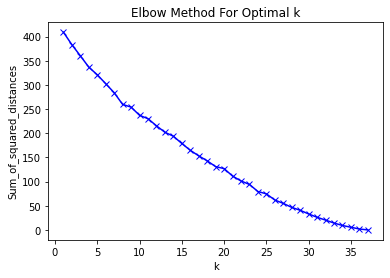

In [292]:
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [293]:
# set number of clusters
kclusters = 7

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mb_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([5, 1, 3, 1, 4, 2, 1, 3, 3, 1])

In [294]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

mb_merged = mb_data
mb_merged.dropna(how= "any", inplace = True)
mb_merged.tail()

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
mb_merged = mb_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
mb_merged.tail()

,namelsad10,total_pop,totalunits,occupied,vacant,rent,shape_area,age_mdn,maleagemdn,fmlagemdn,latitude,longitude,Borough,Neighborhood,pop_density,housing_occupied_ratio,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
190,Census Tract 960,0,0,0,0,0,0.000045,0.0,0.0,0.0,40.646062,-73.913784,Bronx,Port Morris,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
673,Census Tract 154,0,0,0,0,0,0.000098,0.0,0.0,0.0,40.611072,-74.018204,Brooklyn,Dyker Heights,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755,Census Tract 177,0,0,0,0,0,0.000270,0.0,0.0,0.0,40.660606,-73.970594,Manhattan,Tudor City,0,0.0,4.0,Italian Restaurant,Park,Wine Bar,Bakery,Breakfast Spot,Southern / Soul Food Restaurant,Flower Shop,Sports Bar,Chinese Restaurant,Garden
893,Census Tract 5,0,112,0,112,0,0.000439,0.0,0.0,0.0,40.687190,-74.013628,Brooklyn,Red Hook,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1047,Census Tract 86.02,0,0,0,0,0,0.000047,0.0,0.0,0.0,40.748518,-73.963536,Manhattan,Sutton Place,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [296]:
mb_merged.dropna(how= "any", inplace= True)
mb_merged.tail()

,namelsad10,total_pop,totalunits,occupied,vacant,rent,shape_area,age_mdn,maleagemdn,fmlagemdn,latitude,longitude,Borough,Neighborhood,pop_density,housing_occupied_ratio,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
698,Census Tract 852,29,10,9,1,1,0.000043,39.5,20.5,46.0,40.647125,-73.938071,Brooklyn,East Williamsburg,0.000932477,0.9,3.0,Spanish Restaurant,Bookstore,Latin American Restaurant,Thai Restaurant,Park,Gym / Fitness Center,Bubble Tea Shop,Empanada Restaurant,Lounge,Spa
50,Census Tract 217.03,6,4,4,0,0,0.000034,25.5,28.5,25.5,40.817350,-73.949527,Manhattan,Hamilton Heights,0.000246481,1.0,1.0,Gym,Wine Shop,Coffee Shop,Gym / Fitness Center,Pizza Place,Café,Burger Joint,Sandwich Place,Cocktail Bar,Italian Restaurant
903,Census Tract 143,25,0,0,0,0,0.000380,43.2,43.3,36.5,40.782424,-73.965435,Brooklyn,Brighton Beach,9.06243e-05,0.0,1.0,American Restaurant,Italian Restaurant,Café,Cocktail Bar,Gym,Grocery Store,Jazz Club,Latin American Restaurant,Gym / Fitness Center,Bar
753,Census Tract 175,5,2,2,0,0,0.000209,51.5,51.5,66.0,40.651902,-73.991219,Manhattan,Flatiron,3.29492e-05,1.0,0.0,Theater,Bakery,Wine Shop,Burger Joint,Indie Theater,Coffee Shop,Peruvian Restaurant,Mediterranean Restaurant,Spa,Cosmetics Shop
755,Census Tract 177,0,0,0,0,0,0.000270,0.0,0.0,0.0,40.660606,-73.970594,Manhattan,Tudor City,0,0.0,4.0,Italian Restaurant,Park,Wine Bar,Bakery,Breakfast Spot,Southern / Soul Food Restaurant,Flower Shop,Sports Bar,Chinese Restaurant,Garden


In [299]:
mb_merged["Cluster Labels"] = mb_merged["Cluster Labels"].astype( "int", copy=False, errors='raise')
mb_merged.tail()

,namelsad10,total_pop,totalunits,occupied,vacant,rent,shape_area,age_mdn,maleagemdn,fmlagemdn,latitude,longitude,Borough,Neighborhood,pop_density,housing_occupied_ratio,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
698,Census Tract 852,29,10,9,1,1,0.000043,39.5,20.5,46.0,40.647125,-73.938071,Brooklyn,East Williamsburg,0.000932477,0.9,3,Spanish Restaurant,Bookstore,Latin American Restaurant,Thai Restaurant,Park,Gym / Fitness Center,Bubble Tea Shop,Empanada Restaurant,Lounge,Spa
50,Census Tract 217.03,6,4,4,0,0,0.000034,25.5,28.5,25.5,40.817350,-73.949527,Manhattan,Hamilton Heights,0.000246481,1.0,1,Gym,Wine Shop,Coffee Shop,Gym / Fitness Center,Pizza Place,Café,Burger Joint,Sandwich Place,Cocktail Bar,Italian Restaurant
903,Census Tract 143,25,0,0,0,0,0.000380,43.2,43.3,36.5,40.782424,-73.965435,Brooklyn,Brighton Beach,9.06243e-05,0.0,1,American Restaurant,Italian Restaurant,Café,Cocktail Bar,Gym,Grocery Store,Jazz Club,Latin American Restaurant,Gym / Fitness Center,Bar
753,Census Tract 175,5,2,2,0,0,0.000209,51.5,51.5,66.0,40.651902,-73.991219,Manhattan,Flatiron,3.29492e-05,1.0,0,Theater,Bakery,Wine Shop,Burger Joint,Indie Theater,Coffee Shop,Peruvian Restaurant,Mediterranean Restaurant,Spa,Cosmetics Shop
755,Census Tract 177,0,0,0,0,0,0.000270,0.0,0.0,0.0,40.660606,-73.970594,Manhattan,Tudor City,0,0.0,4,Italian Restaurant,Park,Wine Bar,Bakery,Breakfast Spot,Southern / Soul Food Restaurant,Flower Shop,Sports Bar,Chinese Restaurant,Garden


In [300]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters (not useful)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mb_merged['latitude'], mb_merged['longitude'], mb_merged['Neighborhood'], mb_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [303]:
cluster1 = mb_merged.loc[mb_merged['Cluster Labels'] == 1, mb_merged.columns[[1] + list(range(5, mb_merged.shape[1]))]]
cluster1.shape

(187, 23)

In [305]:
mb_merged.tail()

,namelsad10,total_pop,totalunits,occupied,vacant,rent,shape_area,age_mdn,maleagemdn,fmlagemdn,latitude,longitude,Borough,Neighborhood,pop_density,housing_occupied_ratio,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
698,Census Tract 852,29,10,9,1,1,0.000043,39.5,20.5,46.0,40.647125,-73.938071,Brooklyn,East Williamsburg,0.000932477,0.9,3,Spanish Restaurant,Bookstore,Latin American Restaurant,Thai Restaurant,Park,Gym / Fitness Center,Bubble Tea Shop,Empanada Restaurant,Lounge,Spa
50,Census Tract 217.03,6,4,4,0,0,0.000034,25.5,28.5,25.5,40.817350,-73.949527,Manhattan,Hamilton Heights,0.000246481,1.0,1,Gym,Wine Shop,Coffee Shop,Gym / Fitness Center,Pizza Place,Café,Burger Joint,Sandwich Place,Cocktail Bar,Italian Restaurant
903,Census Tract 143,25,0,0,0,0,0.000380,43.2,43.3,36.5,40.782424,-73.965435,Brooklyn,Brighton Beach,9.06243e-05,0.0,1,American Restaurant,Italian Restaurant,Café,Cocktail Bar,Gym,Grocery Store,Jazz Club,Latin American Restaurant,Gym / Fitness Center,Bar
753,Census Tract 175,5,2,2,0,0,0.000209,51.5,51.5,66.0,40.651902,-73.991219,Manhattan,Flatiron,3.29492e-05,1.0,0,Theater,Bakery,Wine Shop,Burger Joint,Indie Theater,Coffee Shop,Peruvian Restaurant,Mediterranean Restaurant,Spa,Cosmetics Shop
755,Census Tract 177,0,0,0,0,0,0.000270,0.0,0.0,0.0,40.660606,-73.970594,Manhattan,Tudor City,0,0.0,4,Italian Restaurant,Park,Wine Bar,Bakery,Breakfast Spot,Southern / Soul Food Restaurant,Flower Shop,Sports Bar,Chinese Restaurant,Garden


In [331]:
MB = mb_merged.sort_values(by ="pop_density", ascending=False).iloc[:,10:-1]
MB["total_pop"] = mb_merged["total_pop"]
MB.head(10)

,latitude,longitude,Borough,Neighborhood,pop_density,housing_occupied_ratio,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,total_pop
821,40.781357,-73.949124,Manhattan,Roosevelt Island,1,0.933604,1,Coffee Shop,Pizza Place,Vietnamese Restaurant,Cocktail Bar,Sandwich Place,Pub,Bagel Shop,Peruvian Restaurant,Community Center,13749
991,40.845800,-73.934457,Brooklyn,East Flatbush,0.997268,0.952960,3,Latin American Restaurant,Pizza Place,Tapas Restaurant,Café,Mobile Phone Shop,Fast Food Restaurant,Farmers Market,Lounge,Spanish Restaurant,12087
814,40.783579,-73.947504,Manhattan,Yorkville,0.937269,0.929302,1,Deli / Bodega,Gym,Coffee Shop,Italian Restaurant,Café,Wine Shop,Wine Bar,Vietnamese Restaurant,Sandwich Place,5345
73,40.778823,-73.950977,Manhattan,Hamilton Heights,0.933862,0.901902,1,Gym,Wine Shop,Coffee Shop,Gym / Fitness Center,Pizza Place,Café,Burger Joint,Sandwich Place,Cocktail Bar,7904
54,40.809032,-73.958600,Brooklyn,Flatbush,0.908105,0.941637,1,Cocktail Bar,Gym / Fitness Center,Park,Bakery,Italian Restaurant,Gym,Thai Restaurant,Burger Joint,Café,3329
858,40.836848,-73.942223,Brooklyn,Bedford Stuyvesant,0.906082,0.950393,5,Bookstore,Mexican Restaurant,Bakery,Latin American Restaurant,Park,Deli / Bodega,Jazz Club,Museum,Laundry Service,14934
64,40.768474,-73.958527,Brooklyn,Flatbush,0.897473,0.887732,1,Cocktail Bar,Gym / Fitness Center,Park,Bakery,Italian Restaurant,Gym,Thai Restaurant,Burger Joint,Café,12774
992,40.774930,-73.953818,Queens,Hunters Point,0.881707,0.899877,1,Italian Restaurant,Ice Cream Shop,Bakery,Bar,Park,Pizza Place,Seafood Restaurant,American Restaurant,Bookstore,12444
905,40.740079,-73.979234,Brooklyn,Windsor Terrace,0.867448,0.931525,6,Indian Restaurant,Gourmet Shop,Bar,Grocery Store,Yoga Studio,Sandwich Place,New American Restaurant,Mediterranean Restaurant,Hotel,11740
861,40.842934,-73.938343,Brooklyn,East Williamsburg,0.855212,0.952658,3,Spanish Restaurant,Bookstore,Latin American Restaurant,Thai Restaurant,Park,Gym / Fitness Center,Bubble Tea Shop,Empanada Restaurant,Lounge,11236
